In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/housing.csv')

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.isnull().sum()/df.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [6]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

(array([3.820e+02, 5.470e+02, 1.040e+03, 1.736e+03, 2.460e+03, 2.355e+03,
        2.237e+03, 1.879e+03, 1.671e+03, 1.204e+03, 9.060e+02, 7.980e+02,
        6.100e+02, 4.500e+02, 3.360e+02, 2.890e+02, 2.500e+02, 1.810e+02,
        1.760e+02, 1.500e+02, 1.180e+02, 1.150e+02, 7.300e+01, 8.900e+01,
        7.100e+01, 5.800e+01, 4.700e+01, 4.500e+01, 3.600e+01, 3.000e+01,
        2.800e+01, 2.500e+01, 1.300e+01, 1.900e+01, 1.900e+01, 1.800e+01,
        8.000e+00, 1.400e+01, 2.000e+01, 1.300e+01, 1.500e+01, 9.000e+00,
        8.000e+00, 8.000e+00, 8.000e+00, 4.000e+00, 7.000e+00, 5.000e+00,
        2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

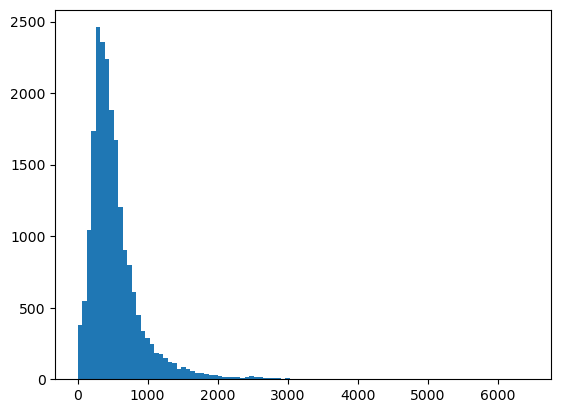

In [8]:
plt.hist(df['total_bedrooms'].values, 100)

In [9]:
onehotencoder = OneHotEncoder(sparse=False)
result = onehotencoder.fit_transform(df[['ocean_proximity']])

/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])

<Axes: >

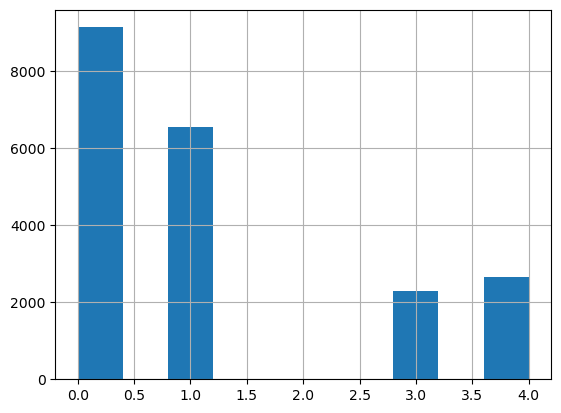

In [11]:
df['ocean_proximity'].hist()

# Feature Scaling Methods

• Min-max normalization

• Sensitive to outliers


In [12]:
X = df.values[:, 5:9].astype(dtype=np.float32)

In [13]:
X.shape

(20640, 4)

In [14]:
x_min = X.min(axis=0)
x_max = X.max(axis=0)
print(f'min : {x_min} \nmax : {x_max}')

min : [3.0000e+00 1.0000e+00 4.9990e-01 1.4999e+04] 
max : [3.56820e+04 6.08200e+03 1.50001e+01 5.00001e+05]


In [15]:
X = (X-x_min)/(x_max-x_min)

In [16]:
print(f'scaling data: ')
print(X)

scaling data: 
[[0.00894083 0.02055583 0.53966844 0.9022664 ]
 [0.06721041 0.18697582 0.53802705 0.7082466 ]
 [0.01381765 0.02894261 0.46602806 0.6950507 ]
 ...
 [0.0281398  0.07104095 0.08276438 0.15938285]
 [0.02068444 0.05722743 0.09429525 0.1437128 ]
 [0.03879033 0.08699227 0.13025339 0.15340349]]


• Z-Score normalization (Standardization)

• Good for normal distribution

In [17]:
X = df.values[:, 5:9].astype(dtype=np.float32)
X

array([[3.2200e+02, 1.2600e+02, 8.3252e+00, 4.5260e+05],
       [2.4010e+03, 1.1380e+03, 8.3014e+00, 3.5850e+05],
       [4.9600e+02, 1.7700e+02, 7.2574e+00, 3.5210e+05],
       ...,
       [1.0070e+03, 4.3300e+02, 1.7000e+00, 9.2300e+04],
       [7.4100e+02, 3.4900e+02, 1.8672e+00, 8.4700e+04],
       [1.3870e+03, 5.3000e+02, 2.3886e+00, 8.9400e+04]], dtype=float32)

In [18]:
x_mean = np.mean(X, axis=0)
x_std = np.std(X, axis=0)

In [19]:
X = (X-x_mean)/x_std

In [20]:
X

array([[-0.97442853, -0.97703284,  2.3447657 ,  2.1296315 ],
       [ 0.86143893,  1.669961  ,  2.332238  ,  1.3141562 ],
       [-0.8207773 , -0.8436369 ,  1.7826993 ,  1.2586935 ],
       ...,
       [-0.36953714, -0.1740416 , -1.1425933 , -0.9927465 ],
       [-0.6044293 , -0.39375255, -1.0545828 , -1.0586084 ],
       [-0.03397696,  0.07967223, -0.78012943, -1.0178779 ]],
      dtype=float32)

In [21]:
cars = pd.read_csv('Data/cars.csv')
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [22]:
float_col = cars.select_dtypes(exclude=object)

In [23]:
cars_corr = float_col.corr()
cars_corr

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
MPG,1.000000,-0.735563,-0.764277,-0.726670,-0.787510,0.424490,0.586234
Cylinders,-0.735563,1.000000,0.951787,0.823467,0.895220,-0.522452,-0.360762
Displacement,-0.764277,0.951787,1.000000,0.873758,0.932475,-0.557984,-0.381714
Horsepower,-0.726670,0.823467,0.873758,1.000000,0.840811,-0.682047,-0.419929
Weight,-0.787510,0.895220,0.932475,0.840811,1.000000,-0.430086,-0.315389
Acceleration,0.424490,-0.522452,-0.557984,-0.682047,-0.430086,1.000000,0.301992
Model,0.586234,-0.360762,-0.381714,-0.419929,-0.315389,0.301992,1.000000


In [24]:
cars_corr.style.background_gradient()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
MPG,1.000000,-0.735563,-0.764277,-0.726670,-0.787510,0.424490,0.586234
Cylinders,-0.735563,1.000000,0.951787,0.823467,0.895220,-0.522452,-0.360762
Displacement,-0.764277,0.951787,1.000000,0.873758,0.932475,-0.557984,-0.381714
Horsepower,-0.726670,0.823467,0.873758,1.000000,0.840811,-0.682047,-0.419929
Weight,-0.787510,0.895220,0.932475,0.840811,1.000000,-0.430086,-0.315389
Acceleration,0.424490,-0.522452,-0.557984,-0.682047,-0.430086,1.000000,0.301992
Model,0.586234,-0.360762,-0.381714,-0.419929,-0.315389,0.301992,1.000000


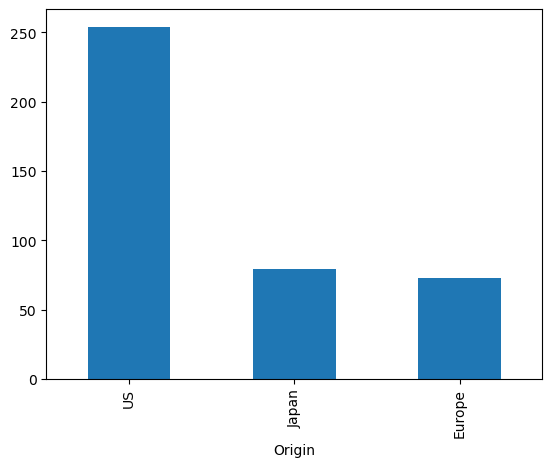

In [38]:
cars['Origin'].value_counts().plot(kind='bar')
plt.show()